In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG
# You may need to install the Python graphviz library. At the command line:
#   pip install graphviz
# You will also need to install the graphviz executables. You can use apt,
# macports, or other installer for your system.
from graphviz import Source
df = pd.read_csv("agaricus-lepiota.csv")
df['poisonous'] = df.poisonous.map({'e':0, 'p':1})
df


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Pick characteristics more correlated with poiseness mushrooms via research
https://environment.co/how-to-identify-poisonous-mushrooms/ https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/#:~:text=Avoid%20mushrooms%20with%20white%20gills,on%20the%20cap%20or%20stem.

Reasearch says

bulbous growth at the base of a mushroom stem
White gills
Red on cap or stem
Strange odor


Find most correlated odors with poisonous mushrooms

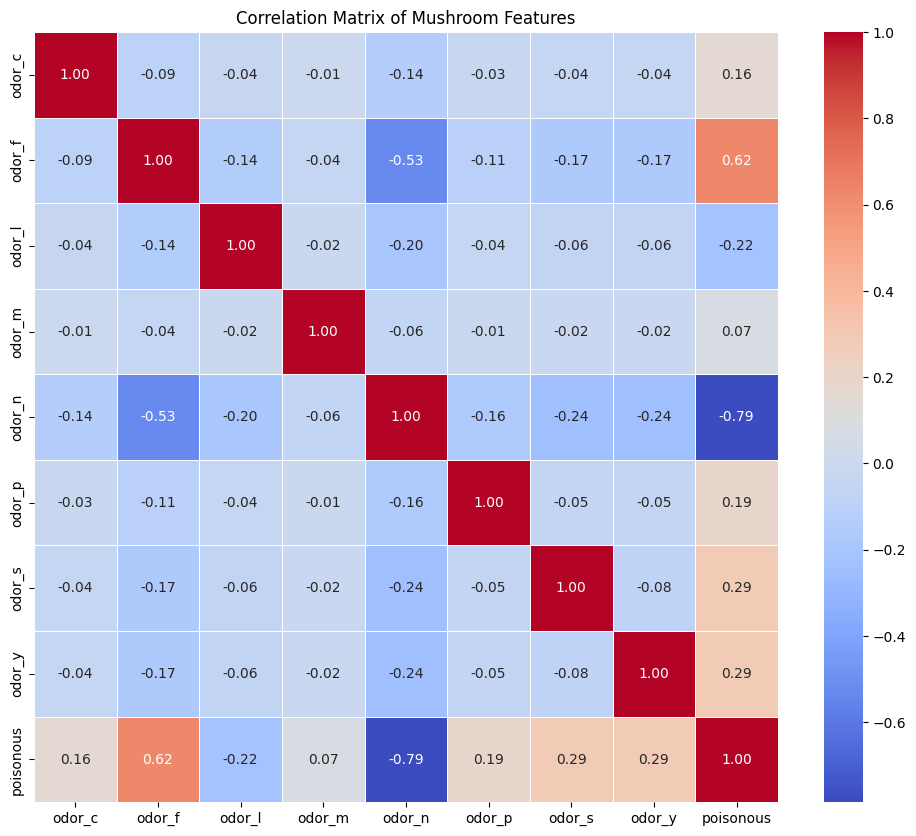

In [4]:

df_odors = pd.get_dummies(df['odor'], prefix='odor', drop_first=True)
df = pd.concat([df, df_odors], axis=1)
related = df_odors.columns.tolist()
X = df[related]
y = df['poisonous']


df_corr = pd.concat([X, y], axis=1)  # Combine features and target for correlation
correlation_matrix = df_corr.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Mushroom Features')
plt.show()


Create new feature for any red color


In [6]:
red_related_columns = ['cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring']

df['contains-red'] = df[red_related_columns].apply(lambda row: 'e' in row.values, axis=1)

df[df['contains-red'] == True]


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,habitat,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,contains-red
939,0,x,y,e,t,n,f,c,b,u,...,d,False,False,False,False,True,False,False,False,True
1050,0,x,f,e,t,n,f,c,b,w,...,d,False,False,False,False,True,False,False,False,True
1162,0,x,f,e,t,n,f,c,b,p,...,d,False,False,False,False,True,False,False,False,True
1192,0,x,f,e,t,n,f,c,b,p,...,d,False,False,False,False,True,False,False,False,True
1226,0,x,y,e,t,n,f,c,b,w,...,d,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,1,k,s,e,f,y,f,c,n,b,...,d,False,False,False,False,False,False,False,True,True
8101,1,k,s,e,f,s,f,c,n,b,...,p,False,False,False,False,False,False,True,False,True
8108,1,k,y,e,f,y,f,c,n,b,...,l,False,False,False,False,False,False,False,True,True
8113,1,k,y,e,f,y,f,c,n,b,...,d,False,False,False,False,False,False,False,True,True


Create new fields for other correlated features


In [8]:
df['gill-white'] = df['gill-color'] == 'w'
df['skirt-ring'] = df['ring-type'].isin(['p', 'f'])
df['bulbous-stem'] = df['stalk-root'].isin(['b', 'u'])
df


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,contains-red,gill-white,skirt-ring,bulbous-stem
0,1,x,s,n,t,p,f,c,n,k,...,False,False,False,True,False,False,False,False,True,False
1,0,x,s,y,t,a,f,c,b,k,...,False,False,False,False,False,False,False,False,True,False
2,0,b,s,w,t,l,f,c,b,n,...,True,False,False,False,False,False,False,False,True,False
3,1,x,y,w,t,p,f,c,n,n,...,False,False,False,True,False,False,False,False,True,False
4,0,x,s,g,f,n,f,w,b,k,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,False,False,True,False,False,False,False,False,True,False
8120,0,x,s,n,f,n,a,c,b,y,...,False,False,True,False,False,False,False,False,True,False
8121,0,f,s,n,f,n,a,c,b,n,...,False,False,True,False,False,False,False,False,True,False
8122,1,k,y,n,f,y,f,c,n,b,...,False,False,False,False,False,True,False,False,False,False


Create decision tree

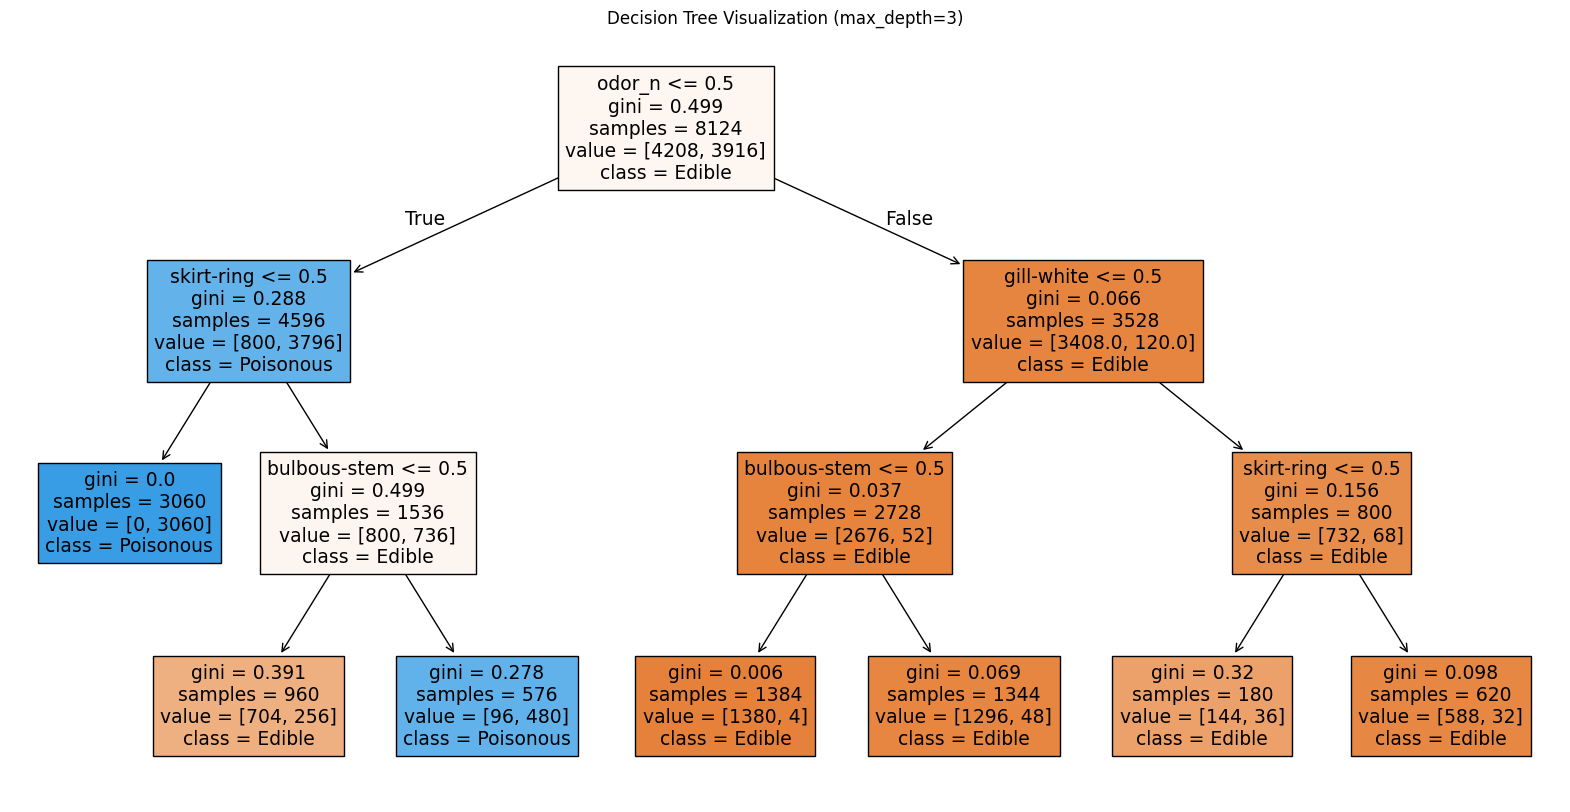

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

feature_cols = ['odor_n','contains-red','gill-white','bulbous-stem', 'skirt-ring'] 
X = df[feature_cols]
y = df['poisonous']  
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)
plt.figure(figsize=(20,10))
plot_tree(treeclf, feature_names=feature_cols, class_names=['Edible', 'Poisonous'], filled=True)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()


Test Tree

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

print(f"Precision (Poisonous): {precision[1]:.2f}, Precision (Non-Poisonous): {precision[0]:.2f}")
print(f"Recall (Poisonous): {recall[1]:.2f}, Recall (Non-Poisonous): {recall[0]:.2f}")
print(f"F1 Score (Poisonous): {fscore[1]:.2f}, F1 Score (Non-Poisonous): {fscore[0]:.2f}")

Precision (Poisonous): 0.96, Precision (Non-Poisonous): 0.91
Recall (Poisonous): 0.90, Recall (Non-Poisonous): 0.97
F1 Score (Poisonous): 0.93, F1 Score (Non-Poisonous): 0.94


Neural Network

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Model 1


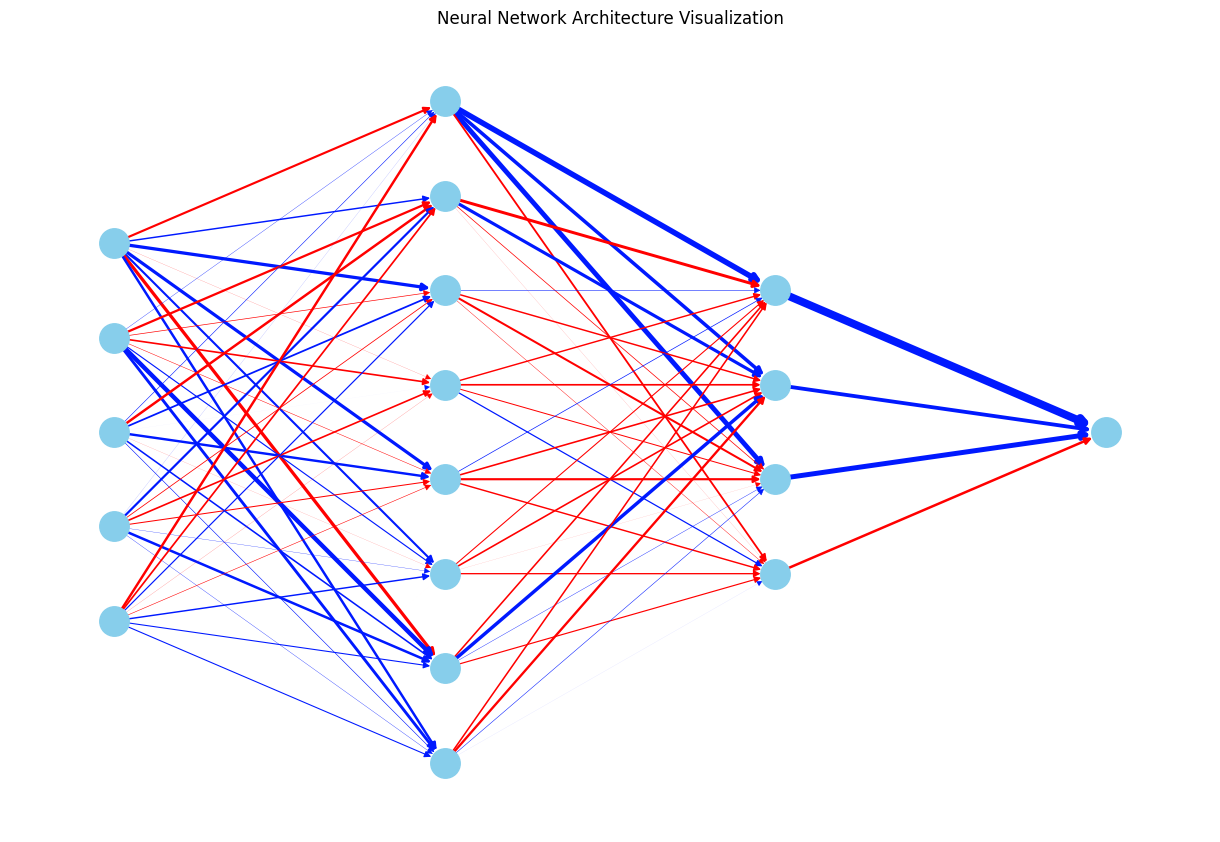

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
Accuracy: 0.94
Precision: 0.96, Recall: 0.91, F1 Score: 0.93

Training Model 2


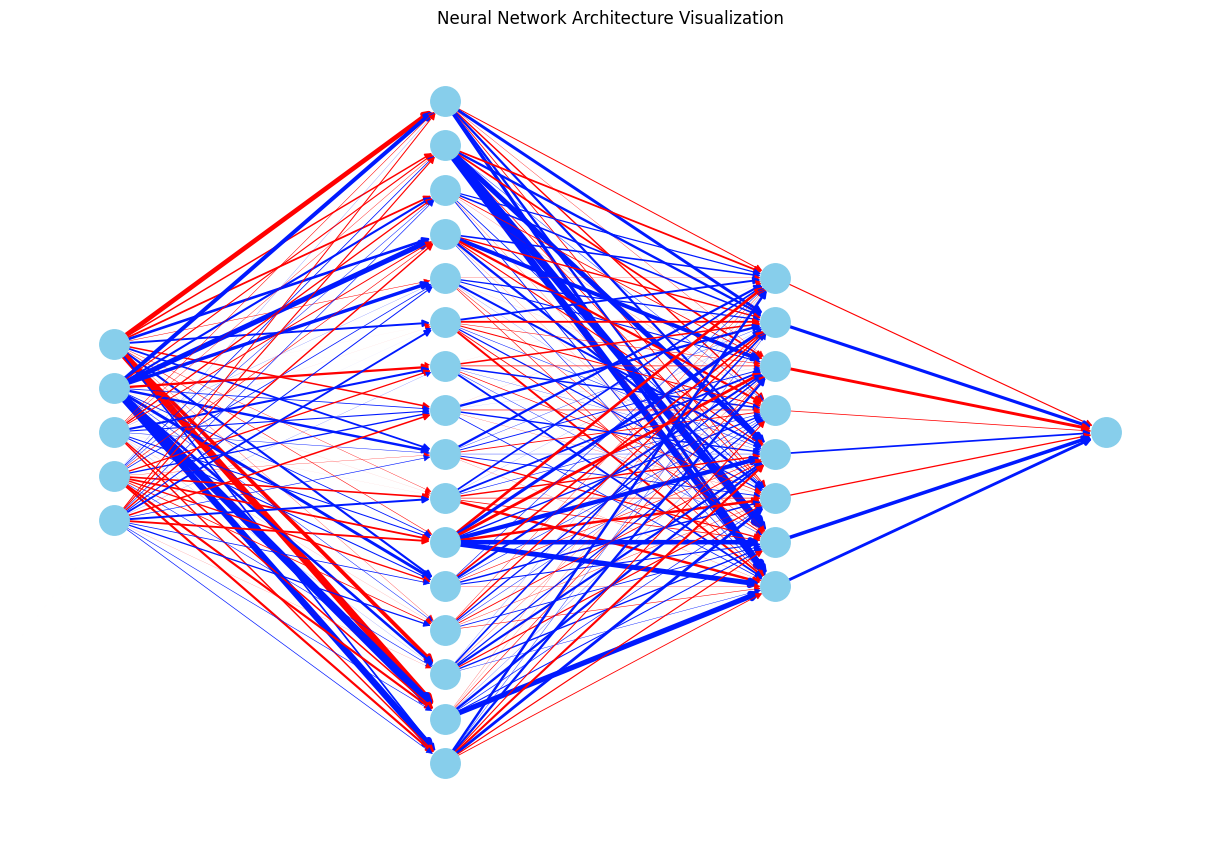

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
Accuracy: 0.94
Precision: 0.96, Recall: 0.91, F1 Score: 0.93

Training Model 3


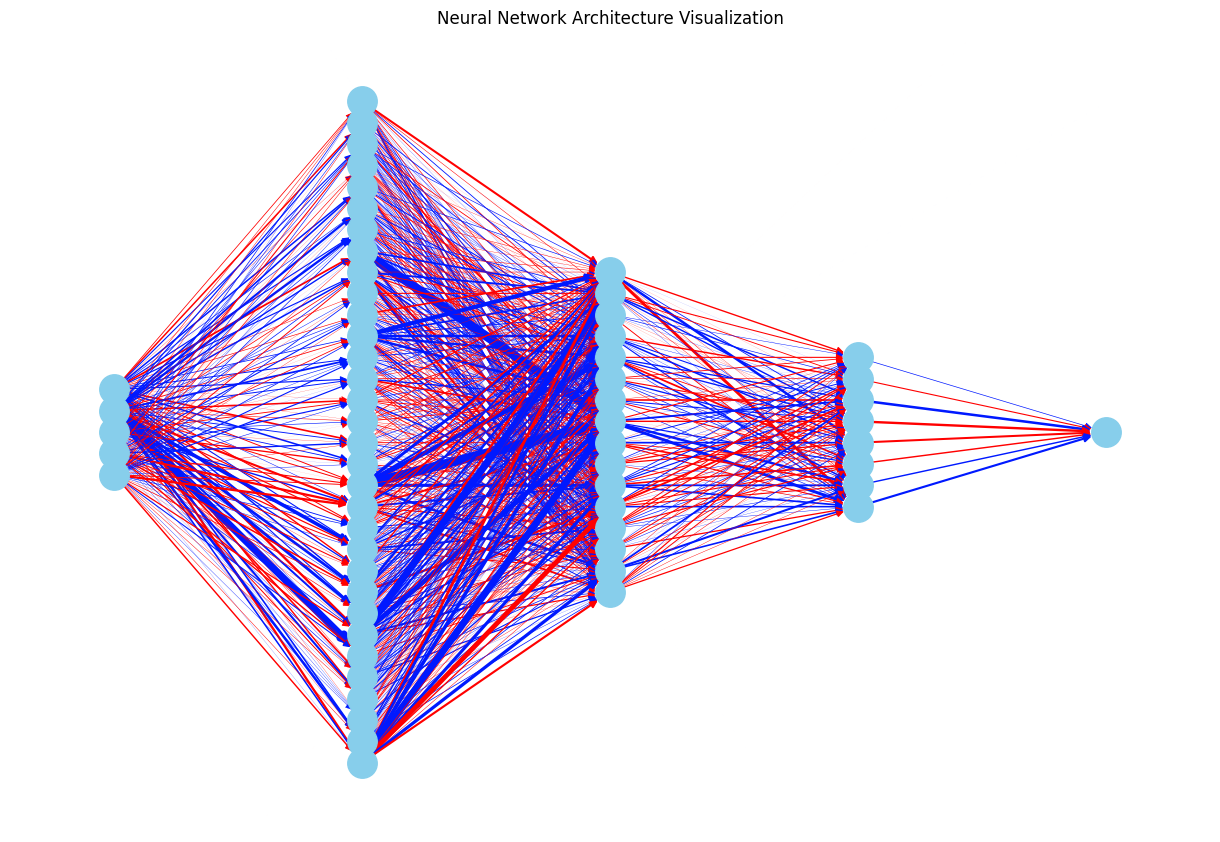

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
Accuracy: 0.94
Precision: 0.96, Recall: 0.91, F1 Score: 0.93


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import networkx as nx
import colorsys
import matplotlib.pyplot as plt

feature_cols = ['odor_n', 'contains-red', 'gill-white', 'bulbous-stem', 'skirt-ring']
X = df[feature_cols].astype(float)
y = df['poisonous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Three different architectures
def create_small_model():
    model = Sequential([
        Dense(8, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_medium_model():
    model = Sequential([
        Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_large_model():
    model = Sequential([
        Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# To visualize the neural network
def show_keras_ann(keras_model):
    input_neurons_n = keras_model.layers[0].get_weights()[0].shape[0]
    hidden_layers_n = len(keras_model.layers) - 1
    layers_n = hidden_layers_n + 2
    hidden_neurons_n = [layer.get_weights()[0].shape[1] for layer in keras_model.layers[:-1]]
    output_neurons_n = keras_model.layers[-1].get_weights()[0].shape[1]

    G = nx.DiGraph()
    pos = {}

    # I/P layer nodes
    for i in range(input_neurons_n):
        pos[f'Layer0_{i}'] = (0, -i + input_neurons_n / 2)

    # Hidden layer nodes and edges
    for j in range(hidden_layers_n):
        prev_layer_size = input_neurons_n if j == 0 else hidden_neurons_n[j - 1]
        current_layer_size = hidden_neurons_n[j]
        weights = keras_model.layers[j].get_weights()[0]

        for i in range(current_layer_size):
            pos[f'Layer{j+1}_{i}'] = (j + 1, -i + current_layer_size / 2)
            for k in range(prev_layer_size):
                w = weights[k, i]
                G.add_edge(f'Layer{j}_{k}', f'Layer{j+1}_{i}', weight=w)

    # Output layer nodes and edges
    prev_layer_size = hidden_neurons_n[-1]
    for i in range(output_neurons_n):
        pos[f'Layer{layers_n-1}_{i}'] = (layers_n - 1, -i + output_neurons_n / 2)
        weights = keras_model.layers[-1].get_weights()[0]
        for k in range(prev_layer_size):
            w = weights[k, i]
            G.add_edge(f'Layer{hidden_layers_n}_{k}', f'Layer{layers_n-1}_{i}', weight=w)


    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65, 1, 1) for u, v in edges]
    weights = [abs(G[u][v]['weight']) * 2 for u, v in edges]
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_size=450, node_color='skyblue', edge_color=colors, width=weights)
    plt.title("Neural Network Architecture Visualization")
    plt.show()

# Train, visualize, and evaluate each model
models = [create_small_model(), create_medium_model(), create_large_model()]
for i, model in enumerate(models, 1):
    print(f"\nTraining Model {i}")
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
    show_keras_ann(model)
    
    # Evaluate on test data
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {fscore:.2f}")

Comparison of Feature Importance and Model 1,2 and 3 Input weights

Decision Tree Feature Importances:
odor_n: 0.75
contains-red: 0.00
gill-white: 0.00
bulbous-stem: 0.08
skirt-ring: 0.16

Model 1 - Average Input Layer Weights:
odor_n: 0.81
contains-red: 0.62
gill-white: 0.43
bulbous-stem: 0.40
skirt-ring: 0.43


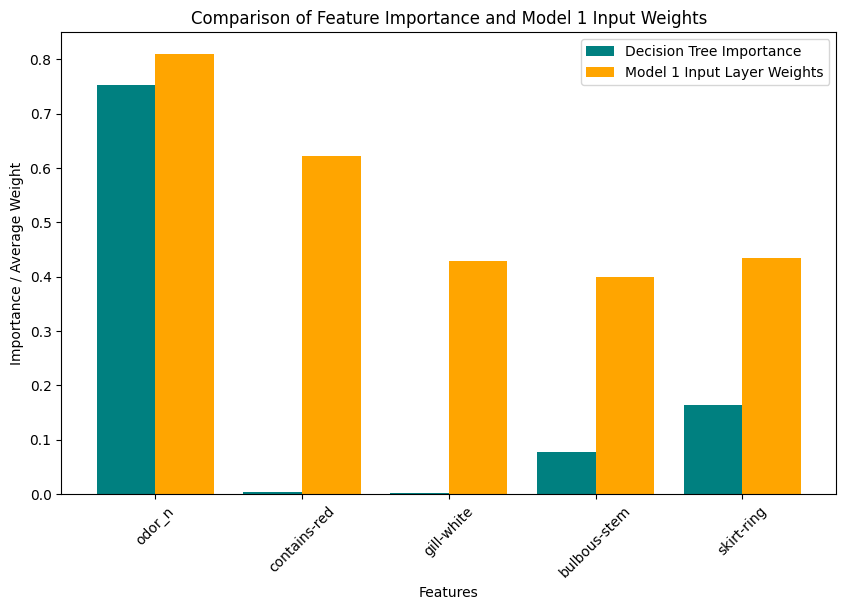


Model 2 - Average Input Layer Weights:
odor_n: 0.72
contains-red: 0.96
gill-white: 0.28
bulbous-stem: 0.36
skirt-ring: 0.37


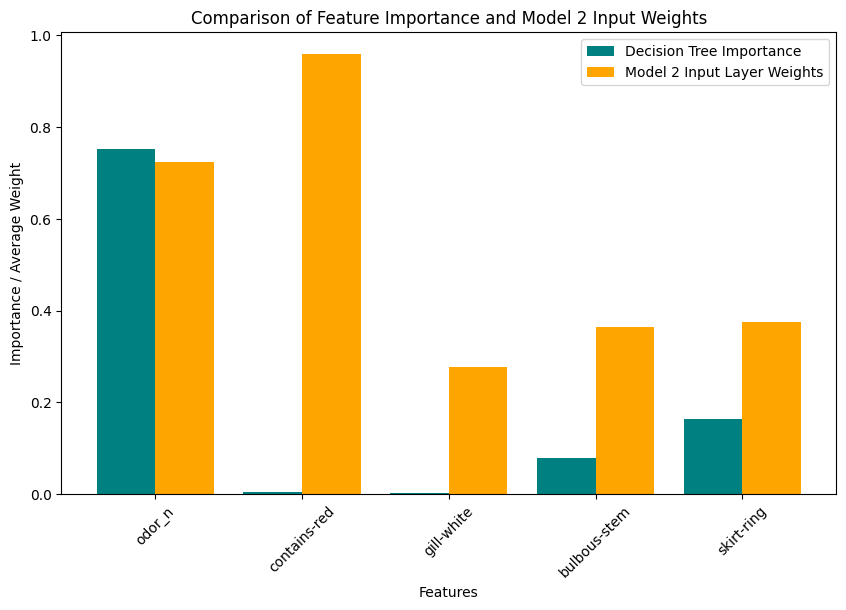


Model 3 - Average Input Layer Weights:
odor_n: 0.37
contains-red: 0.58
gill-white: 0.16
bulbous-stem: 0.24
skirt-ring: 0.24


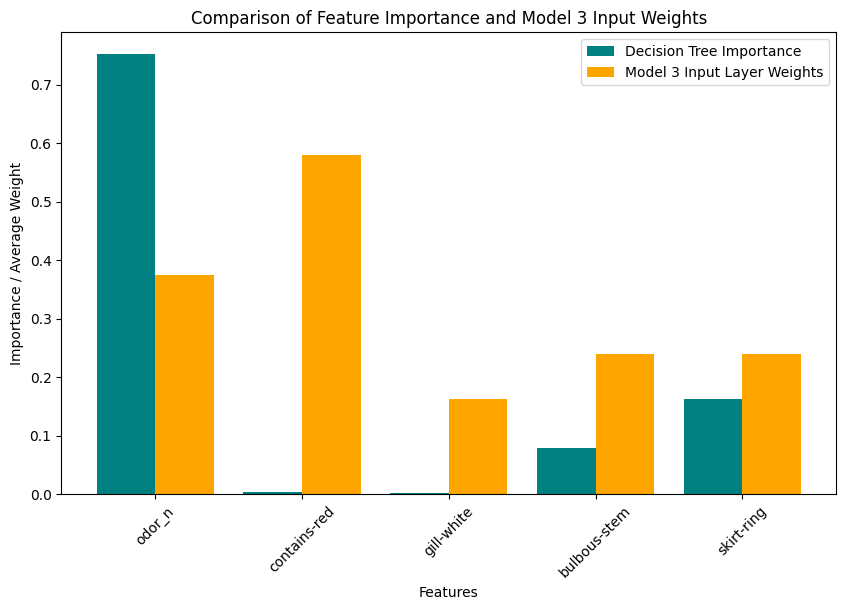

In [20]:
# Train a decision tree model for comparison
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_y_pred)
tree_feature_importances = tree_model.feature_importances_

import numpy as np
import matplotlib.pyplot as plt

feature_names = X.columns
print("Decision Tree Feature Importances:")
for feature, importance in zip(feature_names, tree_feature_importances):
    print(f"{feature}: {importance:.2f}")

# plot feature importances vs. neural network input weights
def plot_importances_vs_weights(tree_importances, nn_weights, model_name):
    x = np.arange(len(feature_names))
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, tree_importances, width=0.4, label='Decision Tree Importance', color='teal')
    plt.bar(x + 0.2, nn_weights, width=0.4, label=f'{model_name} Input Layer Weights', color='orange')
    
    plt.xlabel('Features')
    plt.ylabel('Importance / Average Weight')
    plt.title(f'Comparison of Feature Importance and {model_name} Input Weights')
    plt.xticks(ticks=x, labels=feature_names, rotation=45)
    plt.legend()
    plt.show()

for i, model in enumerate(models, 1):
    # average I/P layer weights
    weights = model.layers[0].get_weights()[0]
    avg_weights = np.mean(np.abs(weights), axis=1)
    
    print(f"\nModel {i} - Average Input Layer Weights:")
    for feature, weight in zip(feature_names, avg_weights):
        print(f"{feature}: {weight:.2f}")
    
    plot_importances_vs_weights(tree_feature_importances, avg_weights, f'Model {i}')

    